In [1]:
# Modified version based on GSY's Transmon.py (for HW1)
import qutip as qt
import scipy as scp
import scipy.constants as const
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [2]:
def Jospehson_Energy_from_Junction_resistance_for_Al(Rj):

    # Define parameters
    Tc = 1.2                            # K         critical temperature of Al
    Delta = 1.764*const.Boltzmann*Tc    # Joules    superconducting energy gap of Al
    # Calculate critical current (AB formula)
    T = 20e-3 # Kelvin
    Ic_AB = (np.pi * Delta / (2 * const.e * Rj)) * np.tanh(Delta / (2 * const.Boltzmann * T))
    # print("Critical current (AB formula) =", Ic_AB)

    EJ = const.hbar*Ic_AB / (2*const.e)
    print("Josephson Energy =", EJ / const.h / 1e9, 'GHz')
    return EJ

### Transmon qubit (Symmetric Junction; EC, EJ, using GHZ unit)


$$
\hat{H} = 4E_c (\hat{n}-n_g)^2 - E_Jcos(\phi_e)cos(\hat{\phi})
$$

In [3]:
Cq = 6.68e-15 # 6.68e-15   # given qubit capacitance (F)
Rj = 20e3    # room temperature Junction resistance (Ohm)

In [4]:
# Note: You should finish writing out the formula for the Hamiltonian of the Transmon circuit before trying to understand the code.
# Circuit Parameters
EC_GHz = (const.e**2)/(2*Cq*const.hbar)/1e9                                   # qubit charging energy in (2\pi)GHz
#C = e ** 2 / 2 / EC_GHz / hbar

EJ_GHz = Jospehson_Energy_from_Junction_resistance_for_Al(Rj)/const.hbar/1e9  # qubit Josephson energy in (2\pi)GHz

# Define the driving parameter
n_g = 0 # DC drive to the qubit
phi_e = 0 # flux bias to the qubit

# Define the sweep range of n_g and phi_e for the spectrum
ng_range = np.linspace(-2, 2, 100)  # the sweep range of ng
phie_range = np.linspace(-0.5, 0.5, 100)  # the sweep range of phi_ext


# Define the numerical simulation parameters
N = 5           # the number of lines shown in the spectrum; reserve first N energy levels of Transmon
cutoff = 20     # the numerical cutoff for the Hilbert space

Josephson Energy = 7.1157771645657855 GHz


#### Transmon - charge basis

In [5]:
truncation_c = 2 * cutoff + 1  # the scale of the Hamiltonian matrices
# the matrix representations under charge basis
n_list = np.linspace(-cutoff, cutoff, truncation_c)
cos_phi_value = qt.Qobj(scp.sparse.diags([0.5, 0.5], [-1, 1], shape=(truncation_c, truncation_c), format='csr', dtype='complex128'))
n_operator_value = qt.Qobj(scp.sparse.diags(n_list, 0, shape=(truncation_c, truncation_c), format='csr', dtype='complex128'))

# Constructing the Hamiltonian and getting its eigen-engergies
energies_transmon_c = np.zeros((len(phie_range), N))
for cnt, var in enumerate(phie_range):
    hamiltonian = 4 * EC_GHz * (n_operator_value ** 2 - 2*n_g*n_operator_value) - EJ_GHz * np.cos(2 * np.pi * var)* cos_phi_value
    energies_transmon_c[cnt, :] = np.real(hamiltonian.eigenenergies())[:N]

energies_transmon_c_ng = np.zeros((len(ng_range), N))
for cnt, var in enumerate(ng_range):
    hamiltonian = 4 * EC_GHz * (n_operator_value ** 2 - 2*var*n_operator_value) - EJ_GHz * np.cos(2* np.pi * phi_e)* cos_phi_value
    energies_transmon_c_ng[cnt, :] = np.real(hamiltonian.eigenenergies())[:N]

#### Transmon - oscillator basis

In [6]:
# truncation_o = 50
# a = qt.destroy(truncation_o)
# phie_range1 = np.linspace(-0.24, 0.24, 100)  # the sweep range of phi_ext

# energies_transmon_o = np.zeros((len(phie_range1), N))
# for cnt, var in enumerate(phie_range1):
#     phi_ext = 2 *np.pi *var
#     E_l_eff = EJ_GHz*np.cos(phi_ext)
#     if E_l_eff <= 0:
#         print("Error: Unsupported basis choice for island qubit with the parameter setting.")
#     else:
#         Phi = (a+a.dag())*(8.0*EC_GHz/E_l_eff)**(0.25)/np.sqrt(2.0)
#         Qn = 1.0j*(a.dag()-a)*(E_l_eff/(8*EC_GHz))**(0.25)/np.sqrt(2.0)

#         hamiltonian = 4.0*EC_GHz*(Qn*Qn - 2*n_g*Qn) - 0.5*EJ_GHz*np.cos(phi_ext)*Phi.cosm()
#         energies_transmon_o[cnt, :] = np.real(hamiltonian.eigenenergies())[:N]
#         #print("Warning: Quantizing the island type qubit with oscillator basis is accurate when EJ>>EC (~100, deep Transmon regime).")

# energies_transmon_o_ng = np.zeros((len(ng_range), N))
# for cnt, var in enumerate(ng_range):

#     E_l_eff = EJ_GHz*np.cos(2 *np.pi *phi_e)

#     Phi = (a+a.dag())*(8.0*EC_GHz/E_l_eff)**(0.25)/np.sqrt(2.0)
#     Qn = 1.0j*(a.dag()-a)*(E_l_eff/(8*EC_GHz))**(0.25)/np.sqrt(2.0)

#     hamiltonian = 4.0*EC_GHz*(Qn*Qn - 2*var*Qn) - 0.5*EJ_GHz*np.cos(2 *np.pi *phi_e)*Phi.cosm()
#     energies_transmon_o_ng[cnt, :] = np.real(hamiltonian.eigenenergies())[:N]


#### Plot the Energy spectrum (v.s. $\phi_e$) for Transmon 

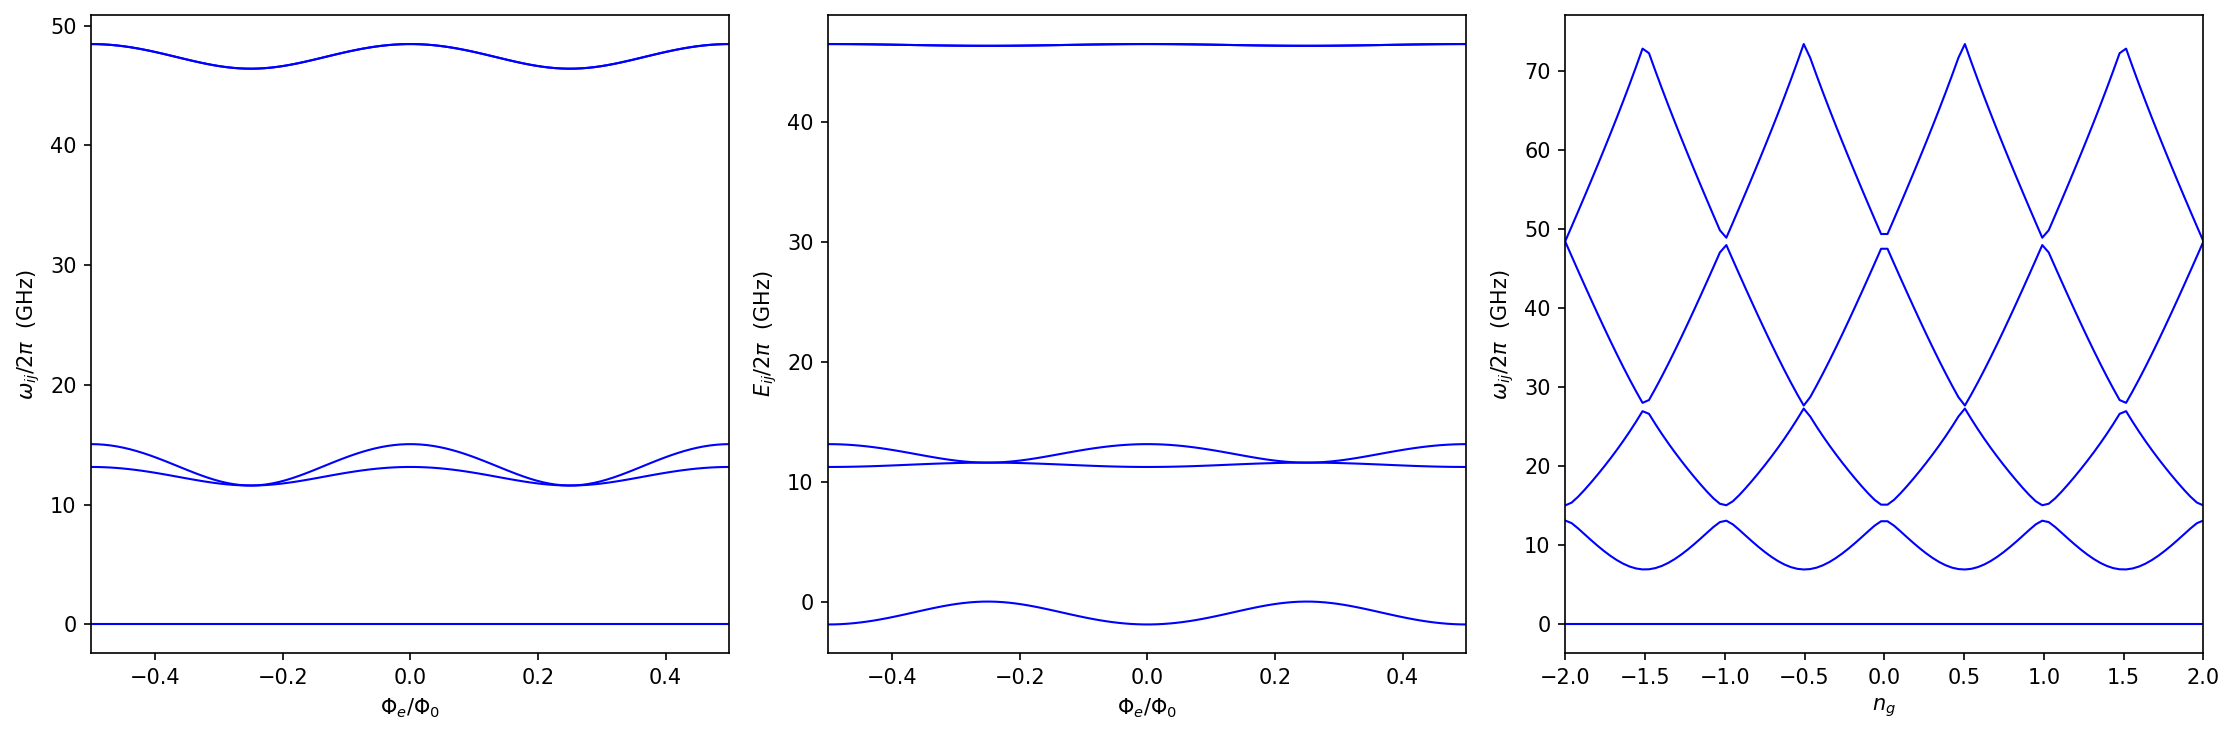

In [7]:
# Plotting the energy spectrum
# You may copy & paste this part, no need for alterations.
plt.figure(figsize = [15, 5])
# Plot frequency (\omega_01, \omega_02, ..., \omega_0n) v.s. phi_e
plt.subplot(131)
plt.xlim([phie_range[0], phie_range[-1]])
plt.xlabel(r'$\Phi_e /\Phi_0$')
plt.ylabel(r'$ \omega_{ij}/2\pi$  (GHz)')
for i in range(N):
    plt.plot(phie_range, (energies_transmon_c[:, i] - energies_transmon_c[:, 0]) / (2 * const.pi), 'b-', linewidth='1')


# Plot energy (E_0, E_1, ..., E_n) v.s. phi_e
plt.subplot(132)
plt.xlim([phie_range[0], phie_range[-1]])
plt.xlabel(r'$\Phi_e /\Phi_0$')
plt.ylabel(r'$ E_{ij}/2\pi$  (GHz)')
for i in range(N):
    plt.plot(phie_range, energies_transmon_c[:, i] / (2 * const.pi),'b-', linewidth='1')

# Plot frequency v.s. ng
plt.subplot(133)
plt.xlim([ng_range[0], ng_range[-1]])
plt.xlabel(r'$n_g$')
plt.ylabel(r'$ \omega_{ij}/2\pi$  (GHz)')
for i in range(N):
    plt.plot(ng_range, (energies_transmon_c_ng[:, i] - energies_transmon_c_ng[:, 0]) / (2 * const.pi), 'b-', linewidth='1')


plt.tight_layout()
plt.show()

## Transmon coupling to a LC Resonator

In [8]:
omega_r = (2*np.pi)*6.88e9

C12 = 6.68e-15
C10 = 6.94e-15
C20 = 6.94e-15 # assume C20 = C10
C13 = 1.68e-15
Cr0 = 2.73e-14 

Rj = 100e3    # room temperature Junction resistance (Ohm)
Lr = 1/ omega_r**2 / (Cr0 + C13)

Cg = 1/2*C13
Cq_star = C12 + 1/4*(C10 + C20 - C13)
Cr_star = Cr0 + 1/2*C13
Cq = Cq_star + Cg
Cr = Cr_star + Cg

In [9]:
ECq_GHz = (const.e**2) / (2*(Cr*Cq-Cg**2)/Cr)  /(const.hbar)/1e9
Ecr_GHz = (const.e**2) / (2*(Cr*Cq-Cg**2)/Cq)  /(const.hbar)/1e9

EJ_GHz = Jospehson_Energy_from_Junction_resistance_for_Al(Rj)/const.hbar/1e9
ELr_GHz = (const.hbar/2/const.e)**2 / (Lr) /const.hbar/1e9

grq = (2*const.e)**2 *Cg / (Cr*Cq - Cg**2) /const.hbar/1e9

# Define the driving parameter
n_g = 0 # DC drive to the qubit
phi_e = 0 # flux bias to the qubit

# Define the sweep range of n_g and phi_e for the spectrum
ng_range = np.linspace(-2, 2, 100)  # the sweep range of ng
phie_range = np.linspace(-0.5, 0.5, 201)  # the sweep range of phi_ext


# Define the numerical simulation parameters
N = 3           # the number of lines shown in the spectrum; reserve first N energy levels of Transmon
cutoff = 20     # the numerical cutoff for the Hilbert space, suggested to be larger than 20

Josephson Energy = 1.423155432913157 GHz


In [14]:
Lq = 30e-9
1/np.sqrt(Cq*Lq) / (2*np.pi) / 1e9

8.937622567753783

In [10]:
truncation_c = 2 * cutoff + 1  # the scale of the Hamiltonian matrices
# the matrix representations under charge basis
n_list = np.linspace(-cutoff, cutoff, truncation_c)
cos_phi_q = qt.Qobj(scp.sparse.diags([0.5, 0.5], [-1, 1], shape=(truncation_c, truncation_c), format='csr', dtype='complex128'))
n_q = qt.Qobj(scp.sparse.diags(n_list, 0, shape=(truncation_c, truncation_c), format='csr', dtype='complex128'))

# Constructing the resonator Hamiltonian
a = qt.destroy(cutoff)
phi_r = (a+a.dag())*(8.0*Ecr_GHz/ELr_GHz)**(0.25)/np.sqrt(2.0)
n_r = 1.0j*(a.dag()-a)*(ELr_GHz/(8*Ecr_GHz))**(0.25)/np.sqrt(2.0)
hamiltonian_r = 4.0*Ecr_GHz*n_r**2 + 0.5*ELr_GHz*phi_r**2

# Constructing the Qubit Hamiltonian and getting its eigen-engergies
energies_transmon_c = np.zeros((len(phie_range), N))
for cnt, var in enumerate(phie_range):
    hamiltonian_q = 4 * ECq_GHz * (n_q ** 2 - 2*n_g*n_q) + EJ_GHz * np.cos(2 * np.pi * var)* cos_phi_q
    energies_transmon_c[cnt, :] = np.real(hamiltonian_q.eigenenergies())[:N]

energies_transmon_c_ng = np.zeros((len(ng_range), N))
for cnt, var in enumerate(ng_range):
    hamiltonian_q = 4 * ECq_GHz * (n_q ** 2 - 2*var*n_q) + EJ_GHz * np.cos(2* np.pi * phi_e)* cos_phi_q
    energies_transmon_c_ng[cnt, :] = np.real(hamiltonian_q.eigenenergies())[:N]

# Constructing the Qubit-resonator Hamiltonian and getting its eigen-engergies
energies_total_c = np.zeros((len(phie_range), N+2))
for cnt, var in enumerate(phie_range):
    hamiltonian_q = 4 * ECq_GHz * (n_q ** 2 - 2*n_g*n_q) + EJ_GHz * np.cos(2 * np.pi * var)* cos_phi_q
    hamiltonian_total = qt.tensor(hamiltonian_q, qt.identity(cutoff))+ qt.tensor(qt.identity(truncation_c), hamiltonian_r) + grq*qt.tensor(n_q, n_r)
    energies_total_c[cnt, :] = np.real(hamiltonian_total.eigenenergies())[:N+2]




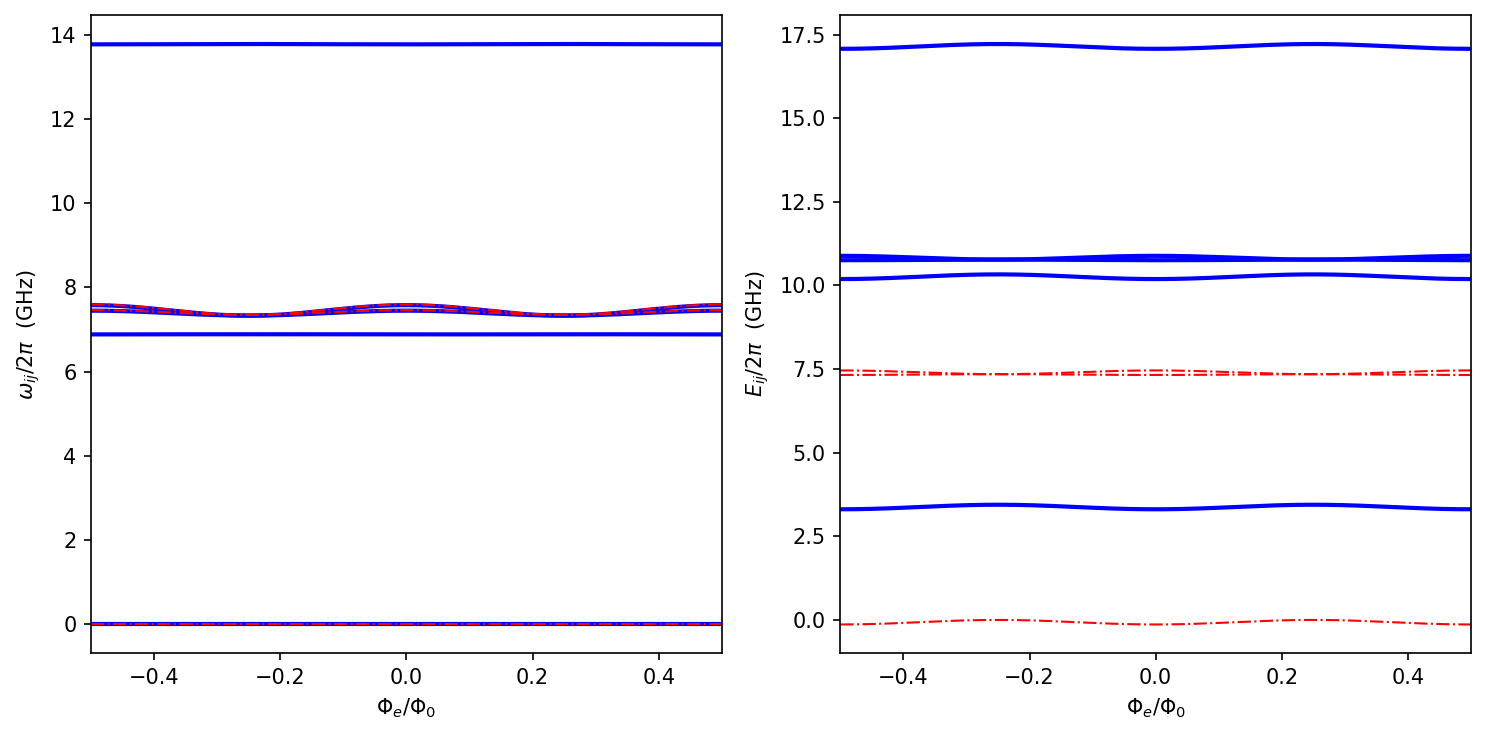

In [11]:
# Plotting the energy spectrum
# You may copy & paste this part, no need for alterations.
plt.figure(figsize = [15, 5])
# Plot frequency (\omega_01, \omega_02, ..., \omega_0n) v.s. phi_e
plt.subplot(131)
plt.xlim([phie_range[0], phie_range[-1]])
plt.xlabel(r'$\Phi_e /\Phi_0$')
plt.ylabel(r'$ \omega_{ij}/2\pi$  (GHz)')
for i in range(N+2):
    plt.plot(phie_range, (energies_total_c[:, i] - energies_total_c[:, 0]) / (2 * const.pi), 'b-', linewidth='2')
for i in range(N):
    plt.plot(phie_range, (energies_transmon_c[:, i] - energies_transmon_c[:, 0]) / (2 * const.pi), 'r-.', linewidth='1')


# Plot energy (E_0, E_1, ..., E_n) v.s. phi_e
plt.subplot(132)
plt.xlim([phie_range[0], phie_range[-1]])
plt.xlabel(r'$\Phi_e /\Phi_0$')
plt.ylabel(r'$ E_{ij}/2\pi$  (GHz)')
for i in range(N+2):
    plt.plot(phie_range, energies_total_c[:, i] / (2 * const.pi),'b-', linewidth='2')
for i in range(N):
    plt.plot(phie_range, energies_transmon_c[:, i] / (2 * const.pi),'r-.', linewidth='1')
    

plt.tight_layout()
plt.show()

(13.5, 14.0)

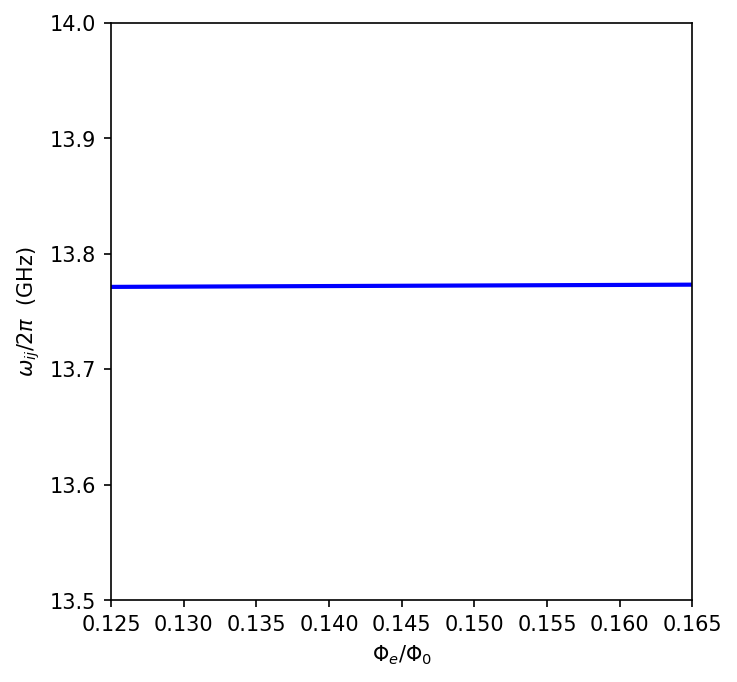

In [12]:
plt.figure(figsize = [5, 5])

plt.xlim([phie_range[0], phie_range[-1]])
plt.xlabel(r'$\Phi_e /\Phi_0$')
plt.ylabel(r'$ \omega_{ij}/2\pi$  (GHz)')
for i in range(N+2):
    plt.plot(phie_range, (energies_total_c[:, i] - energies_total_c[:, 0]) / (2 * const.pi), 'b-', linewidth='2')
for i in range(N):
    plt.plot(phie_range, (energies_transmon_c[:, i] - energies_transmon_c[:, 0]) / (2 * const.pi), 'r-.', linewidth='1')

plt.xlim([0.125, 0.165])
plt.ylim([13.5, 14.0])
